### **Logistic Regression Intuition**

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
from matplotlib.patches import FancyArrowPatch
from ipywidgets import Output
from sklearn.preprocessing import MinMaxScaler

In [36]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Datasets/data.txt')

In [38]:
data.head()

,34.62365962451697,78.0246928153624,0
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


In [39]:
column_names = ["x", "y", "target"]

data.columns = column_names


In [41]:
# Normalize the dataset
for column in data.columns[:-1]:
    data[column] = (data[column] - data[column].mean()) / data[column].std()

In [42]:
data.head(10)

,x,y,target
0,-1.848041,-1.191476,0
1,-1.559952,0.364798,0
2,-0.299192,1.084066,1
3,0.677397,0.495824,1
4,-1.081459,-0.525054,0
5,-0.251318,1.631464,1
6,0.469751,-1.048817,1
7,0.525395,1.143727,1
8,0.957165,-1.210877,1
9,1.549266,-1.495664,0


In [43]:
X_train = data[["x", "y"]].values
y_train = data["target"].values

(99,)


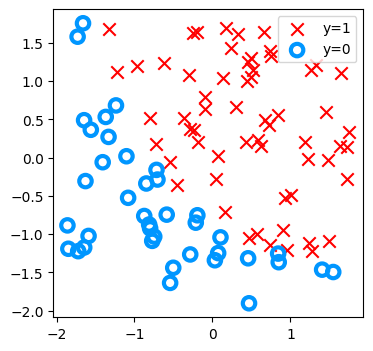

In [44]:
pos_label="y=1"
neg_label="y=0"
fig, ax = plt.subplots(1,1,figsize=(4,4))

pos = y_train == 1
neg = y_train == 0
print(pos.shape)

# Plot examples
ax.scatter(X_train[pos, 0], X_train[pos, 1], marker='x', s=80, c = 'red', label=pos_label)
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best' )

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

In [45]:
def sigmoid(z):
    z = np.clip(z, -500, 500)
    g = 1.0 / (1.0 + np.exp(-z))
    return np.clip(g, 1e-15, 1 - 1e-15)  # Add epsilon to prevent log(0) or log(1-1)


In [46]:
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)

    cost = cost / m
    return cost

In [47]:
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

1.389471001735264


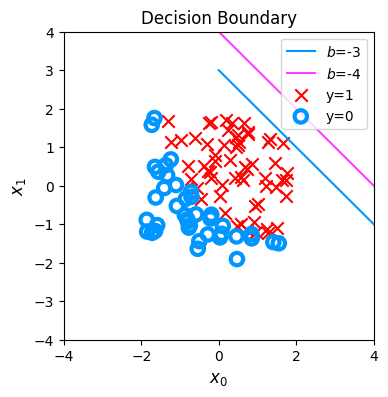

In [52]:
# Choose values between 0 and 6
x0 = np.arange(0,6)

# Plot the two decision boundaries
x1 = 3 - x0
x1_other = 4 - x0

fig,ax = plt.subplots(1, 1, figsize=(4,4))
# Plot the decision boundary
ax.plot(x0,x1, c='#0096ff', label="$b$=-3")
ax.plot(x0,x1_other, c='#FF40FF', label="$b$=-4")
ax.axis([0, 4, 0, 4])

# Plot the original data

ax.scatter(X_train[pos, 0], X_train[pos, 1], marker='x', s=80, c = 'red', label=pos_label)
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best' )

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

ax.axis([-4, 4, -4, 4])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()


In [53]:
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  1.389471001735264
Cost for b = -4 :  1.9342005823772377


In [54]:
def compute_gradient_logistic(X, y, w, b):
    """
    Computes the gradient for linear regression

    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape
    # print(m,n)
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar

    return dj_db, dj_dw

In [55]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """
    Performs batch gradient descent

    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w, b, J_history

In [56]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters)
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.678119310455579   
Iteration 1000: Cost 0.21139186862883944   
Iteration 2000: Cost 0.20592303577566734   
Iteration 3000: Cost 0.20490795701004233   
Iteration 4000: Cost 0.20465640670977325   
Iteration 5000: Cost 0.20458664287542344   
Iteration 6000: Cost 0.20456623572207702   
Iteration 7000: Cost 0.20456010081090806   
Iteration 8000: Cost 0.20455822941523724   
Iteration 9000: Cost 0.20455765401821985   

updated parameters: w:[3.92213911 3.72212083], b:1.75570692192007


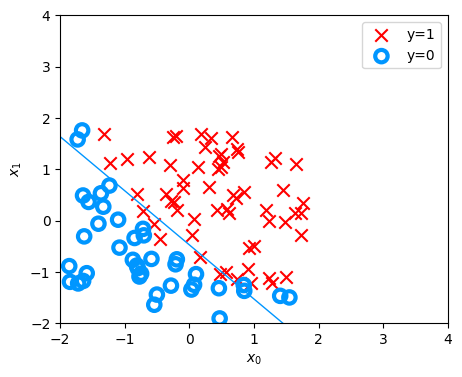

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
ax.axis([-2, 4, -2, 4])

# Plot examples
ax.scatter(X_train[pos, 0], X_train[pos, 1], marker='x', s=80, c='red', label=pos_label)
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best')

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

# Plot the decision boundary
x0_values = np.linspace(-2, 4, 100)
x1_values = -b_out/w_out[1] - (w_out[0]/w_out[1]) * x0_values

ax.plot(x0_values, x1_values, c='#0096ff', lw=1)
plt.show()
